Raha BAdriAzarin -- 4005211001

Autoencoder -- Question 4




In [1]:
from keras.datasets import mnist
from keras.layers import Dense , Input
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Load Data
(x_train , y_train) , (x_test , y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


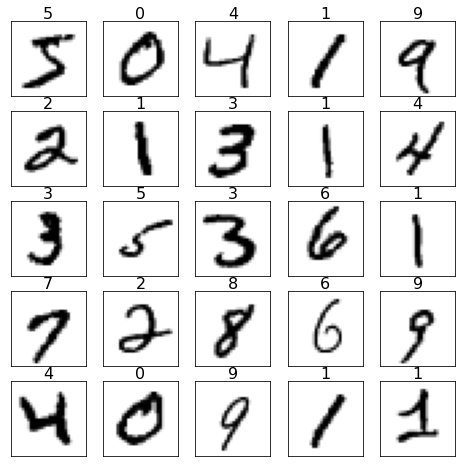

In [3]:
#visualize data
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
  plt.imshow(x_train[i], cmap = plt.cm.binary )
  plt.xticks([])
  plt.yticks([])

plt.show()


In [4]:
#create validation
x_val = x_test[:9000]
x_test = x_test[9000:]

#Normlize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_train = x_train.reshape(len(x_train) , np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test) , np.prod(x_test.shape[1:]))
x_val = x_val.reshape(len(x_val) , np.prod(x_val.shape[1:]))

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(60000, 784)
(1000, 784)
(9000, 784)


In [5]:
#input layer
input_img = Input(shape=(784,))
#encoding architecture
encode_layer1=Dense(units=256 , activation='relu')(input_img)
encode_layer2=Dense(units=128 , activation='relu')(encode_layer1)
#latent view
latent_view=Dense(units=64 , activation='relu')(encode_layer2)
#decoding architecture
decode_layer1=Dense(units=128 , activation='relu')(latent_view)
decode_layer2=Dense(units=256 , activation='relu')(decode_layer1)
#output layer
output_img=Dense(units=784 , activation='sigmoid')(decode_layer2)

In [6]:
autoencoder = Model(input_img , output_img)
encoder = Model(input_img , latent_view)

autoencoder.summary()
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488

In [7]:
autoencoder.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics=['accuracy'] )

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

history=autoencoder.fit(x_train , x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val , x_val),
                callbacks=[callback])

Epoch 1/50
235/235 [==============================] - 8s 29ms/step - loss: 0.2153 - accuracy: 0.0100 - val_loss: 0.1367 - val_accuracy: 0.0108
Epoch 2/50
235/235 [==============================] - 9s 36ms/step - loss: 0.1224 - accuracy: 0.0104 - val_loss: 0.1095 - val_accuracy: 0.0122
Epoch 3/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1060 - accuracy: 0.0119 - val_loss: 0.1002 - val_accuracy: 0.0109
Epoch 4/50
235/235 [==============================] - 6s 26ms/step - loss: 0.0992 - accuracy: 0.0125 - val_loss: 0.0953 - val_accuracy: 0.0108
Epoch 5/50
235/235 [==============================] - 6s 26ms/step - loss: 0.0948 - accuracy: 0.0138 - val_loss: 0.0919 - val_accuracy: 0.0127
Epoch 6/50
235/235 [==============================] - 6s 26ms/step - loss: 0.0916 - accuracy: 0.0144 - val_loss: 0.0890 - val_accuracy: 0.0122
Epoch 7/50
235/235 [==============================] - 6s 27ms/step - loss: 0.0891 - accuracy: 0.0139 - val_loss: 0.0876 - val_accuracy: 0.0122

In [9]:
encoded_imgs=encoder.predict(x_test)
predicted=autoencoder.predict(x_test)


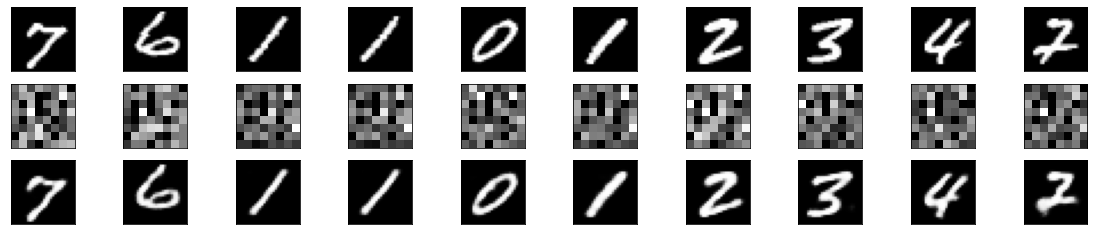

In [10]:
plt.figure(figsize=(40,4))
for i in range (10) :
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20,i+1+20)
  plt.imshow(encoded_imgs[i].reshape(8,8))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20, 2*20 + i+1)
  plt.imshow(predicted[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

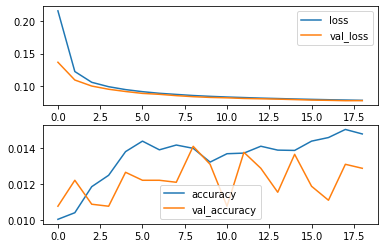

In [11]:
plt.subplot(2,1,1)
plt.plot( history.history['loss'], label = 'loss')
plt.plot( history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history.history['accuracy'], label = 'accuracy')
plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

In [12]:
#evaluation the trained model
[test_loss, test_acc]= autoencoder.evaluate(x_test, x_test)
print('test loss=',test_loss)
print('test accuracy=', test_acc)


32/32 [==============================] - 0s 8ms/step - loss: 0.0801 - accuracy: 0.0150
test loss= 0.08007635921239853
test accuracy= 0.014999999664723873
